In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

**Descriptive Analytics for Numerical Columns**

In [28]:
# Load dataset
df = pd.read_csv("/content/sales_data_with_discounts.csv")

# View first few rows
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [11]:
num_df = df.select_dtypes(include=np.number)
print(num_df.columns)

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [12]:
# Mean, median, standard deviation for numeric columns
means = num_df.mean()
medians = num_df.median()
stds = num_df.std()

# Mode can return multiple rows; take first mode for simplicity
modes = num_df.mode().iloc[0]

summary_stats = pd.DataFrame({
    "mean": means,
    "median": medians,
    "mode": modes,
    "std": stds
})

print(summary_stats)

                           mean       median          mode           std
Volume                 5.066667     4.000000      3.000000      4.231602
Avg Price          10453.433333  1450.000000    400.000000  18079.904840
Total Sales Value  33812.835556  5700.000000  24300.000000  50535.074173
Discount Rate (%)     15.155242    16.577766      5.007822      4.220602
Discount Amount     3346.499424   988.933733     69.177942   4509.902963
Net Sales Value    30466.336131  4677.788059    326.974801  46358.656624


**Data Visualization**

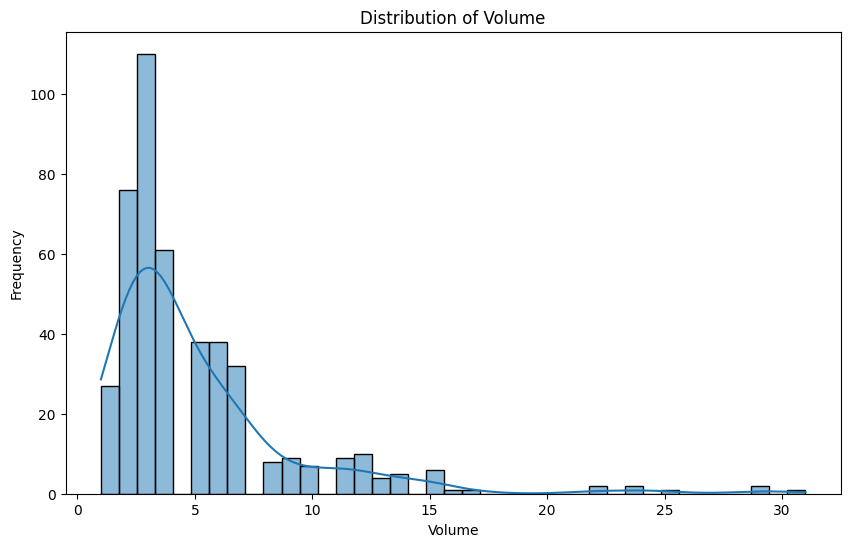

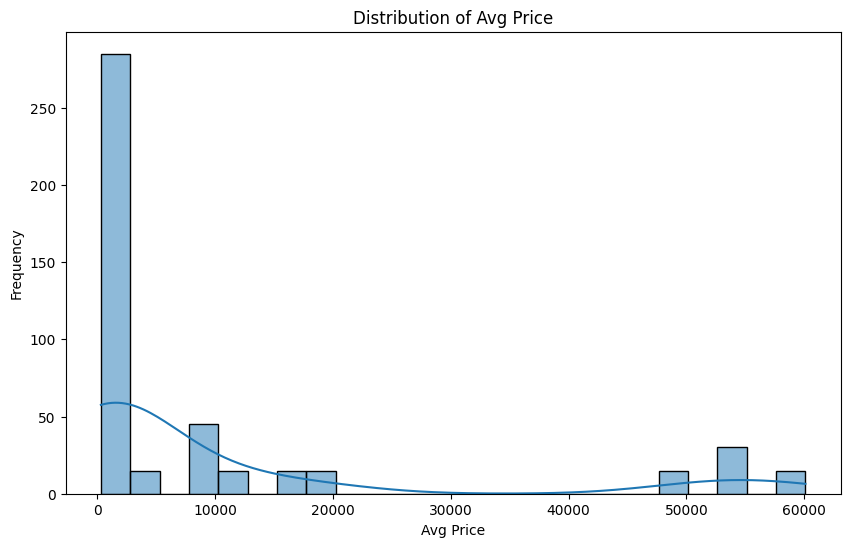

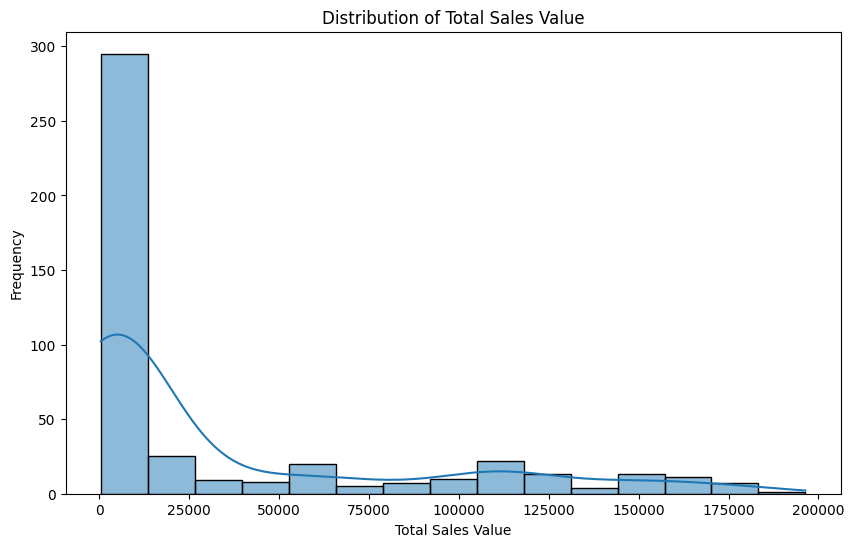

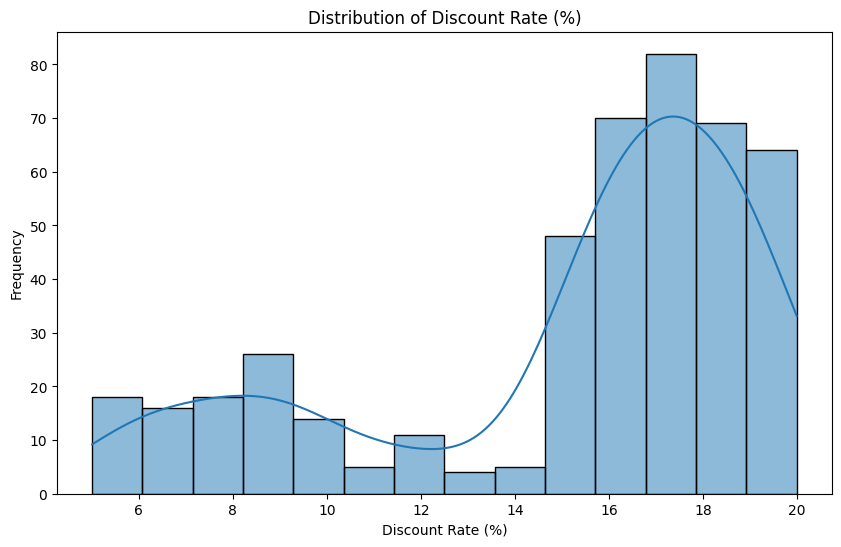

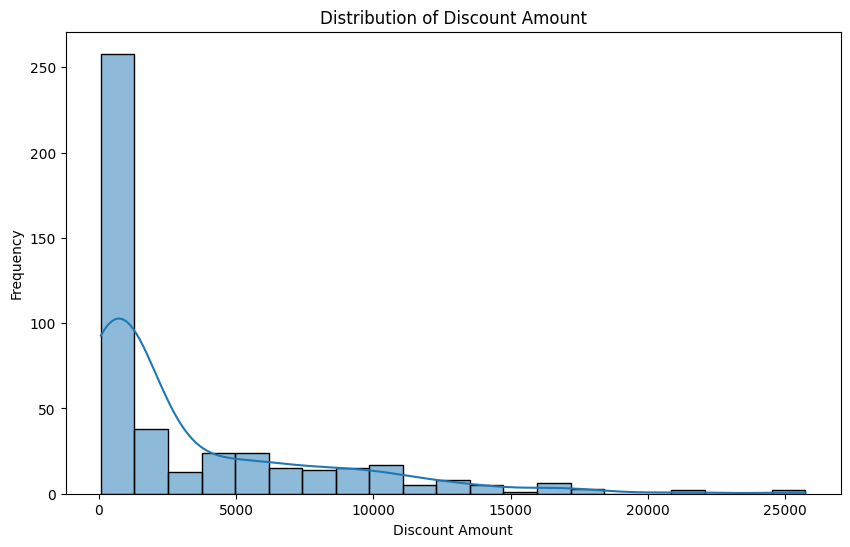

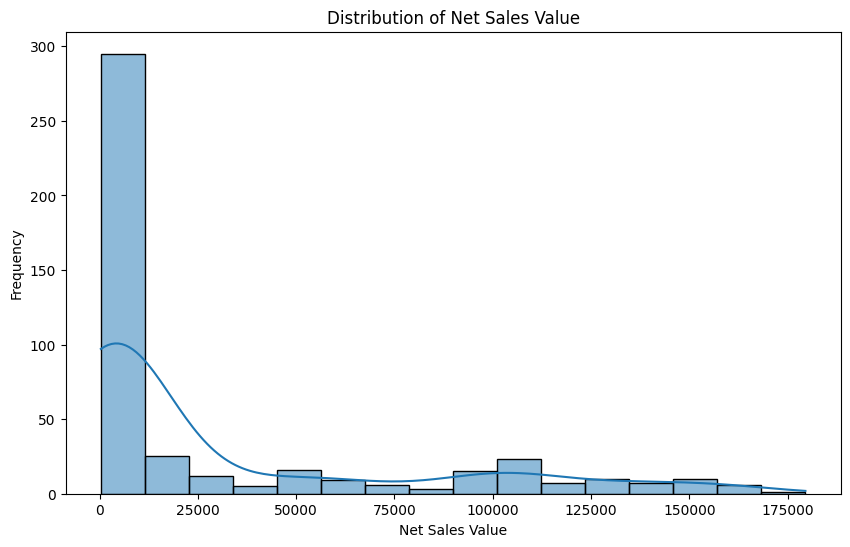

In [16]:
# Loop through each numerical column and plot a histogram
for col in num_df.columns:
    plt.figure(figsize=(10, 6)) # Set figure size for individual plots
    sns.histplot(num_df[col], kde=True) # Plot histogram with KDE
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

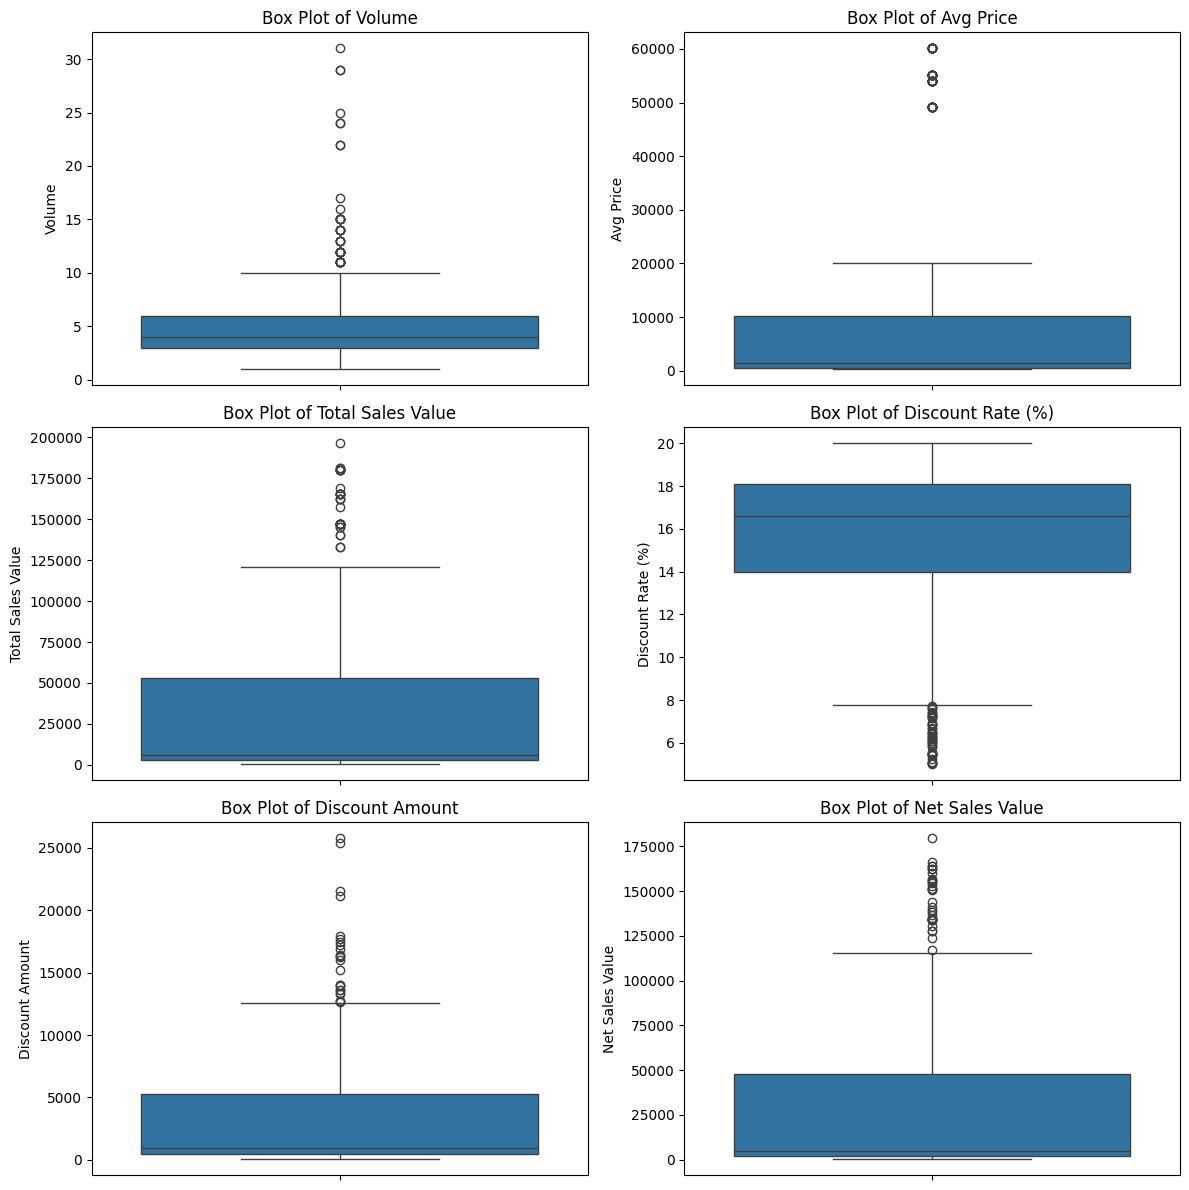

In [23]:
# Get the list of numerical column names
num_cols = num_df.columns

# Number of numeric columns
n = len(num_cols)

# Choose grid size (2 columns, enough rows)
n_cols = 2
n_rows = math.ceil(n / n_cols)

plt.figure(figsize=(12, 4 * n_rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=num_df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Categorical columns identified: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


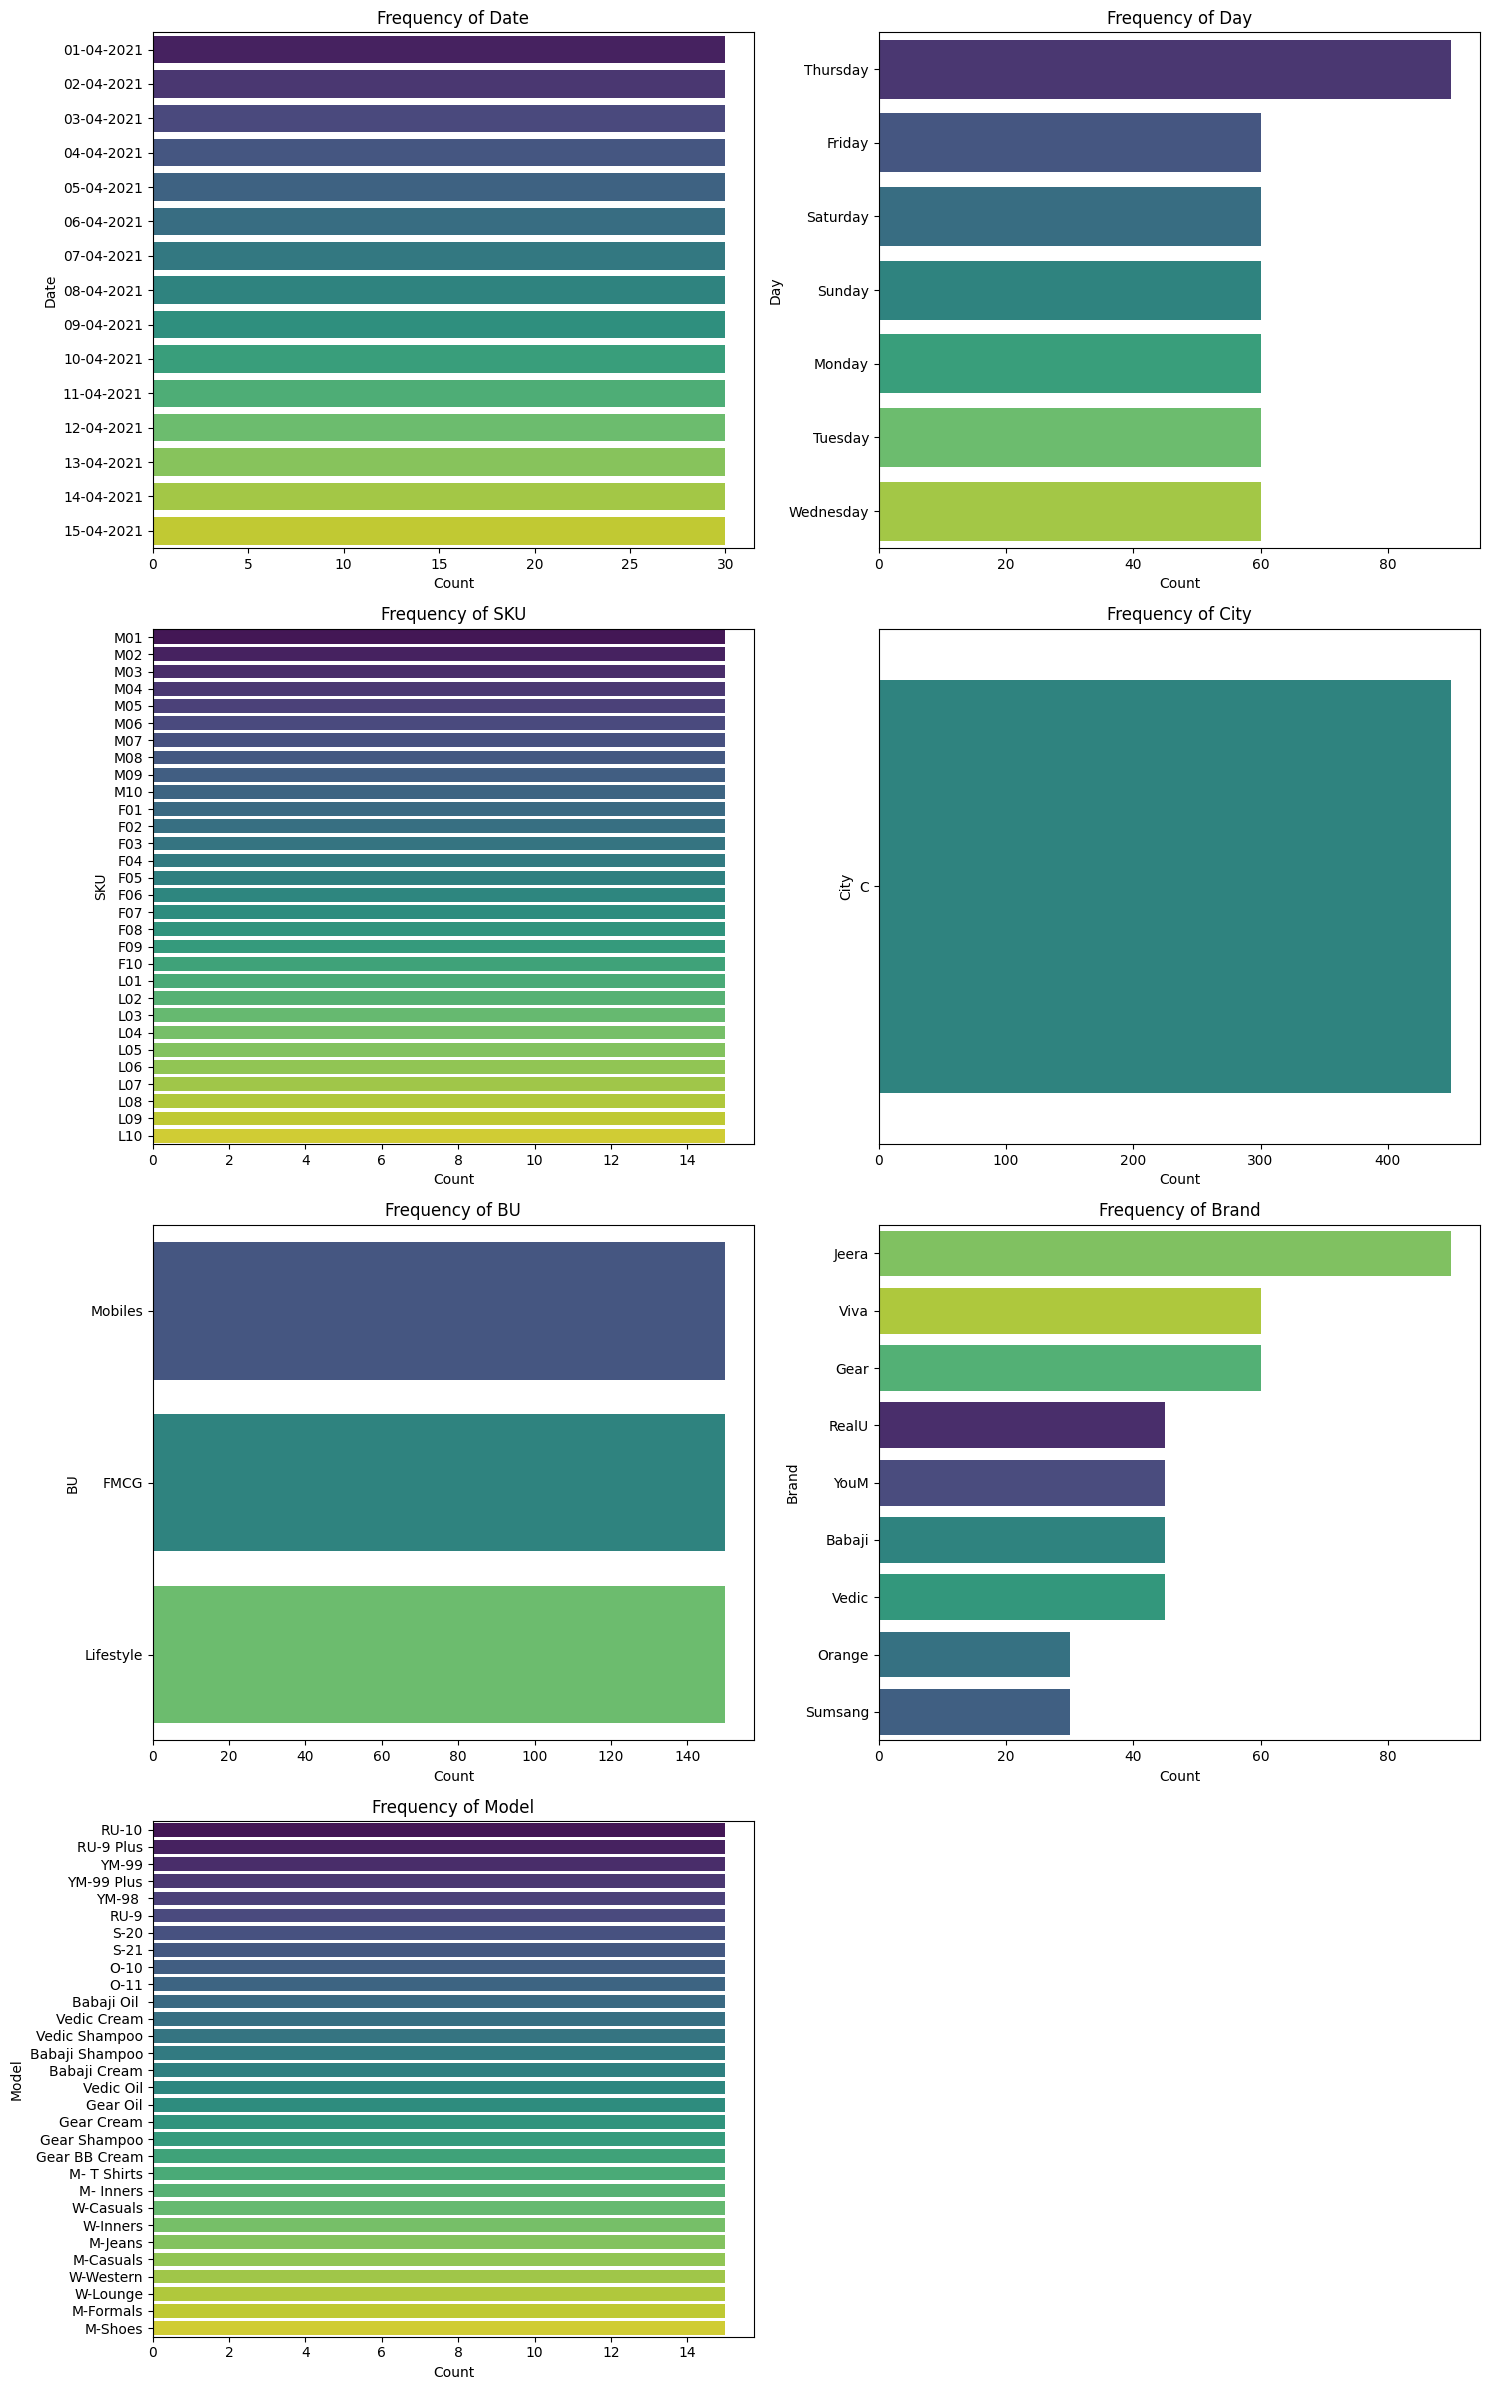

In [25]:
# Identify categorical columns
cat_df = df.select_dtypes(include='object')
print("Categorical columns identified:", cat_df.columns.tolist())

# Set up the figure size for better visualization
n_cat_cols = len(cat_df.columns)
n_cols_plot = 2 # Number of columns for subplots
n_rows_plot = math.ceil(n_cat_cols / n_cols_plot)

plt.figure(figsize=(15, 6 * n_rows_plot))

# Create bar charts for each categorical column
for i, col in enumerate(cat_df.columns):
    plt.subplot(n_rows_plot, n_cols_plot, i + 1)
    sns.countplot(y=cat_df[col], hue=cat_df[col], order=cat_df[col].value_counts().index, palette='viridis', legend=False)
    plt.title(f'Frequency of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

## Conclusion: Summary of Key Findings

Based on the descriptive analytics and data visualizations performed, here are the key insights about the sales data:

### Numerical Data Analysis:

*   **Central Tendency and Dispersion**: The mean, median, mode, and standard deviation for numerical columns like `Volume`, `Avg Price`, `Total Sales Value`, `Discount Amount`, and `Net Sales Value` reveal significant variability. The means are often considerably higher than the medians, suggesting positive skewness.
*   **Skewness**: Histograms confirmed that most sales-related numerical variables (`Volume`, `Avg Price`, `Total Sales Value`, `Discount Amount`, `Net Sales Value`) are **right-skewed**. This indicates that a majority of transactions involve smaller values, with a long tail extending to a few exceptionally large values.
*   **Outliers**: Box plots clearly highlighted the pervasive presence of **outliers** in almost all numerical columns, particularly on the higher end. These extreme values could represent high-value transactions, special promotions, or data entry anomalies. Their presence significantly impacts the mean, pulling it away from the median.
*   **Discount Rate (%)**: This column showed a relatively more spread-out distribution compared to other numerical features, though still with some skewness.

### Categorical Data Analysis:

*   **Date and Day Distribution**: The bar charts showed the frequency of transactions across different dates and days of the week. 'Thursday' appeared to be a dominant day, suggesting higher activity or data recording on that day.
*   **City**: The `City` column was found to be almost uniform (primarily 'C'), indicating that the sales data might be concentrated in a single geographical location or aggregated in a way that obscures finer city-level distinctions.
*   **Business Units (BU) and Brands**: 'Mobiles' was a prominent Business Unit, suggesting it's a significant contributor to sales. Brands and Models also showed varying frequencies, indicating popular products and those with less market presence.
*   **SKU**: As expected, the `SKU` column displayed a wide variety of unique identifiers, with some SKUs appearing much more frequently than others, reflecting product popularity or inventory levels.

### Overall Implications:

The dataset exhibits typical characteristics of sales data, with a few high-value transactions and items driving significant portions of the overall metrics. The presence of outliers is a crucial finding that might require further investigation or specific handling (e.g., Winsorization, robust statistical methods) if predictive modeling is the next step. The insights into categorical distributions provide a foundational understanding of the operational context, such as peak sales days or dominant product categories, which can inform business strategies.